In [2]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
import seaborn as sb
import PIL
from scipy.optimize import curve_fit

In [3]:
## I am using professor grants sample code and will be altering it to fit my needs
MCS = 300 #time step
L = 37 #size of the square lattice
Tc = 2.2691853142130216092 #critical temp
T = np.linspace(2.4,3.0, 10) #range of temprature values that I will use ## I will be fitting for tau against 10 temperature values
print('Here are the fixed temperatures from which we will plot the magnetization per spin:', T)

Here are the fixed temperatures from which we will plot the magnetization per spin: [2.4        2.46666667 2.53333333 2.6        2.66666667 2.73333333
 2.8        2.86666667 2.93333333 3.        ]


In [49]:
##HERE is the bulk of professor grants code that I will use to help
def Energy(spins):
    E = 0 
    for i in range(len(spins)):
        for j in range(len(spins)):
            S = spins[i,j] 
            Neighbors = spins[(i+1)%L, j] + spins[i,(j+1)%L] + spins[(i-1)%L,j] + spins[i,(j-1)%L]
            E += -Neighbors*S
    return E/2.

def McMove (MCS, spins, Five_casesarr):
    E = Energy(spins) 
    #N is the monte carlo steps
    N = L*L
    for k in range(N):
        itest = int(rand()*L)
        jtest = int(rand()*L)
        (i,j) = (itest,jtest)
        S = spins[i,j]
        Neighbors = spins[(i+1)%L, j] + spins[i,(j+1)%L] + spins[(i-1)%L,j] + spins[i,(j-1)%L]
        P = Five_casesarr[4+S*Neighbors]
        if P>rand(): 
            spins[i,j] = -S
        E += 2*S*Neighbors
    return spins

def Infinite_temperature(L):
    spins = np.zeros((L,L), dtype=int)
    for i in range(L):
        for j in range(L):
            spins [i,j] = np.sign(2*rand()-1)
    return spins
def c:
    spins = np.zeros((L,L), dtype=int)
    for i in range(L):
        for j in range(L):
            spins [i,j] = 1
    return spins

## the magnetization is defined by the sum of the spins for each element in the matrix
## divided by the size of the lattice which in our case is L*L

def mag(spins):
    M = np.sum(spins)/(L*L)
    return M

## Note to initalize the initial spins array which must be all up or all down.
print('The starting spin lattice structure:\n',spins)

1.0
The starting spin lattice structure:
 [[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [181]:
## Now I will need to use the given 9 cases and modify to each of the set temperatures

fives = [ [0]*9 for a in range(10)] 
# Here I am initializing an array of arrays which will contain the five_cases for 
# each respective temperature value
j=0
print('Pre-initalization:',fives)
for i in T:
        Five_cases= np.zeros(9, dtype=float) 
        Five_cases[4+4] = np.exp(-4.*2/i)
        Five_cases[4+2] = np.exp(-2.*2/i)
        Five_cases[4+0] = np.exp(0.*2/i)
        Five_cases[4-2] = np.exp( 2.*2/i)
        Five_cases[4-4] = np.exp( 4.*2/i)
        #print(Five_cases) **TESTER**
        if j <10:
            fives[j]=Five_cases
            j=j+1
print('Post-initalization:',fives)

Pre-initalization: [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
Post-initalization: [array([28.03162489,  0.        ,  5.29449005,  0.        ,  1.        ,
        0.        ,  0.1888756 ,  0.        ,  0.03567399]), array([25.61666825,  0.        ,  5.06129116,  0.        ,  1.        ,
        0.        ,  0.19757804,  0.        ,  0.03903708]), array([23.52102582,  0.        ,  4.84984802,  0.        ,  1.        ,
        0.        ,  0.20619203,  0.        ,  0.04251515]), array([21.69155636,  0.        ,  4.6574195 ,  0.        ,  1.        ,
        0.        ,  0.21471117,  0.        ,  0.04610089]), array([20.08553692,  0.        ,  4.48168907,  0.        ,  1.        ,
        0.        ,  0.22313016,  0.        ,  0.04978707]), arra

In [182]:
## now that I have my array of fives at each temprature lets plot the 
#magnetization per spin versus MCS
time = np.linspace(0,MCS,num=MCS) # 300 time steps

## FOR ONE VALUE OF fixed T the plot looks as follows:
# *****BEGINS HERE***

# ** this is for one run at the specific temp
## let's do this about 10 times and calculate the average mag
spins = Zero_temperature(L)
#print(mag(spins)) **TESTER
uno = fives[0]
uno_mag=np.zeros(MCS)
j=0
while j<300:
    uno_mag[j]=np.abs(mag(spins))
    spins = McMove(MCS,spins,uno)
    j=j+1
#print(uno_mag) **TESTER

Text(0.5, 1.0, 'mag versus time for T=2.4 with one run')

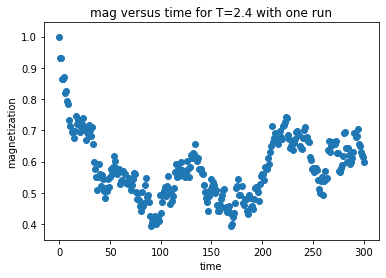

In [183]:
##HERE is mag for one run
plt.scatter(time,uno_mag)
plt.xlabel('time')
plt.ylabel('magnetization')
plt.title('mag versus time for T=2.4 with one run')

In [56]:
## Let's optimize a function that will do this for a fixed temperature value over and over
## repeat the magnetization per spin plot for K times for a fixed temperature
K=10
index=1
uno = fives[0]
uno_mag=np.zeros(MCS)
while index<K+1:
    spins = Zero_temperature(L)
    #print(mag(spins)) **TESTER
    j=0
    while j<300:
        uno_mag[j]+=np.abs(mag(spins))
        spins = McMove(MCS,spins,uno)
        j=j+1
    index=index+1
        
    



In [57]:
print(uno_mag/K)

[1.         0.9431702  0.91161432 0.88195763 0.85960555 0.84353543
 0.82702703 0.81227173 0.79737034 0.76464573 0.76026297 0.75149744
 0.73922571 0.74287801 0.73674215 0.73440467 0.72154858 0.71614317
 0.70211833 0.69379109 0.69408327 0.68634039 0.6734843  0.66325785
 0.63871439 0.63725347 0.64967129 0.63681519 0.63696129 0.63579255
 0.63725347 0.63725347 0.63652301 0.63929876 0.65259313 0.64747991
 0.64879474 0.64616508 0.63550037 0.64178232 0.63593864 0.634916
 0.6147553  0.60701242 0.59167275 0.59839299 0.5982469  0.59342586
 0.60058437 0.60540541 0.59985391 0.61008035 0.61022644 0.60525931
 0.60993426 0.59926954 0.5963477  0.58246896 0.56654492 0.55865595
 0.55894814 0.56420745 0.55164354 0.53791088 0.53221329 0.53119065
 0.53688824 0.54828342 0.54667641 0.54755296 0.54375457 0.5393718
 0.53703433 0.54214755 0.54141709 0.53469686 0.53981008 0.53338203
 0.5211103  0.52695398 0.5284149  0.53484295 0.53557341 0.52520088
 0.52388605 0.51424397 0.51453616 0.51029949 0.51833455 0.5070854

[10.430226]


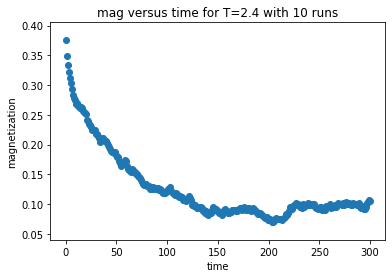

In [73]:
## Here is what it looks after ten reps averaging over K times
plt.scatter(time,uno_mag/K)
plt.xlabel('time')
plt.ylabel('magnetization')
plt.title('mag versus time for T=2.4 with 10 runs')



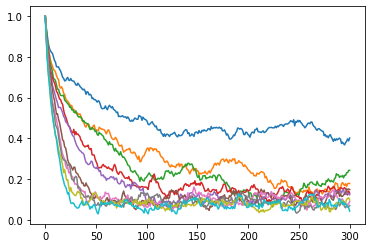

In [62]:
## Now I have to do this for all of the remaining temperatures in the array
for i in fives:
    K=10
    index=1
    uno = i
    uno_mag=np.zeros(MCS)
    while index<K+1:
        spins = Zero_temperature(L)
        #print(mag(spins)) **TESTER
        j=0
        while j<300:
            uno_mag[j]+=np.abs(mag(spins))
            spins = McMove(MCS,spins,uno)
            j=j+1
        index=index+1
    uno_mag=uno_mag/K
    plt.plot(time,uno_mag,label=('T',T[1]))
    plt.xlabel('Time')
    plt.ylabel('<m>')
    plt.legend()

## so as you can see here we have the magnetization for each of the Temperatures(with each temp repeated K times) 
## it shows promise!
## I could do this for K=20 to get cleaner graphs
## the next step would be to obtain the tau for each fixed value of T. 

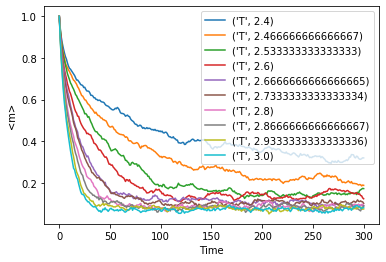

In [74]:
arr_of_temp = [ [0]*MCS for a in range(10)] 
ins=0
count=0
for i in fives:
    K=40
    index=1
    uno = i
    uno_mag=np.zeros(MCS)
    while index<K+1:
        spins = Zero_temperature(L)
        #print(mag(spins)) **TESTER
        j=0
        while j<300:
            uno_mag[j]+=np.abs(mag(spins))
            spins = McMove(MCS,spins,uno)
            j=j+1
        index=index+1
    uno_mag=uno_mag/K
    arr_of_temp[count]=uno_mag
    count = count+1
    plt.plot(time,uno_mag,label=('T',T[ins]))
    ins=ins+1
    plt.xlabel('Time')
    plt.ylabel('<m>')
    plt.legend()
#Note that these graphs could be much more streamlined for higher values of K. If I have time I will compute

[array([1.        , 0.94039445, 0.8981008 , 0.8692111 , 0.84561724,
       0.82490869, 0.80657414, 0.79426589, 0.77574872, 0.76073776,
       0.74981738, 0.74558072, 0.73805698, 0.73082542, 0.72384953,
       0.71570489, 0.70471147, 0.69371804, 0.69404675, 0.68732652,
       0.68042367, 0.67195033, 0.66950329, 0.66749452, 0.65774288,
       0.65924032, 0.64890431, 0.64152666, 0.64046749, 0.63966399,
       0.63217677, 0.62041636, 0.62037984, 0.61680058, 0.60840029,
       0.60858291, 0.60091308, 0.60051132, 0.59536158, 0.59726077,
       0.59627465, 0.5903214 , 0.58823959, 0.5876187 , 0.58487947,
       0.57717312, 0.57187728, 0.57012418, 0.56785975, 0.56365961,
       0.55821768, 0.55474799, 0.55098612, 0.55029218, 0.55266618,
       0.55829072, 0.55569759, 0.56208912, 0.55763331, 0.54963477,
       0.53736304, 0.53345508, 0.53327246, 0.53170197, 0.52823229,
       0.51990504, 0.52297297, 0.52520088, 0.5193572 , 0.51815194,
       0.50704894, 0.50073046, 0.4968225 , 0.49342586, 0.4847

Text(0.5, 1.0, 'Tau versus Temp for 10 Temp values')

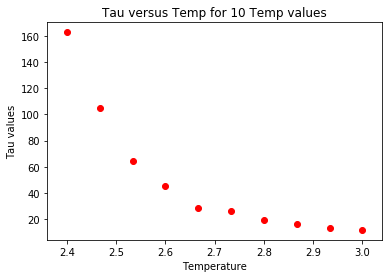

In [78]:
# now let's compute the relevant tau values for each of the fixed temperatures
## we will be using the scipy library to do so cause why not
## c here is the tau constant for each temperature.
def func(t,c):
    return np.exp(-t/c)

## Dry test with the first temepratur value
#popt, pcov = curve_fit(func, time, uno_mag/K)
#print(popt)
    
    ## this output 10.43
    
##Based on what I have plotted I will now continue to optimize this 'ish
## let's try to look at the array of mags for each temperature
## this is what i have defined to be arr_of_temp
print(arr_of_temp)

##Here is the array of the tau values for each respective temperature. 
tau = np.zeros(10)
j=0
for i in arr_of_temp:
    popt,pcov=curve_fit(func,time,i)
    tau[j]=popt
    j=j+1
## now let's just plot tau versus temp.
plt.scatter(T,tau,color='red')
plt.xlabel('Temperature')
plt.ylabel('Tau values')
plt.title('Tau versus Temp for 10 Temp values')

In [94]:
## Now shall we try to fit tau and temperature for A and u 
def func2(T,A,u):
    return A*(T-Tc)**(-u)
#p0=(200,0.3)
popt,pcov=curve_fit(func2,T,tau)
print(popt)
##^^ Those are the values for A and mu
print('A and mu are:',popt[0],popt[1])

[9.11896367 1.43269389]
A and mu are: 9.11896366747541 1.432693886481117


Text(0.5, 1.0, 'Tau versus Temp with best fit A and mu paramters')

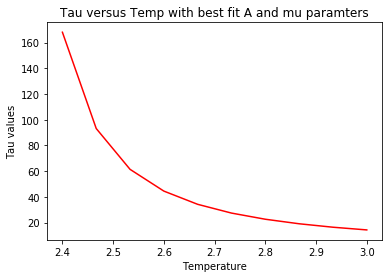

In [95]:
## Here is what our function looks like 
y=func2(T,9.11896367,1.43269389)
plt.plot(T,y,color='red')
plt.xlabel('Temperature')
plt.ylabel('Tau values')
plt.title('Tau versus Temp with best fit A and mu paramters')

# GLAUBER
# The fives function will have to change 
## let's see how she does it
#LODODODODODODODODOLOOOOOOOLODODODOODODO


In [185]:
## the glauber stuff moved based on the changing probs for something to spin
spins=Zero_temperature(L)
fives_2 = [ [0]*9 for a in range(10)] 
# Here I am initializing an array of arrays which will contain the five_cases for 
# each respective temperature value
j=0
print('Pre-initalization:',fives_2)
for i in T:
        Five_cases= np.zeros(9, dtype=float) 
        Five_cases[4+4] = 0.5*(1-np.tanh(4/i))
        Five_cases[4+2] = 0.5*(1-np.tanh(2/i))
        Five_cases[4+0] = 0.5*(1-np.tanh(0/i))
        Five_cases[4-2] = 0.5*(1-np.tanh(-2/i))
        Five_cases[4-4] = 0.5*(1-np.tanh(-4/i))
        print(Five_cases) 
        if j <10:
            print('h')
            fives_2[j]=Five_cases
            j=j+1

print('Post-initalization:',fives_2)

def McMove_glauber(MCS, spins, Five_casesarr):
    E = Energy(spins) 
    #N is the monte carlo steps
    N = L*L
    for k in range(N):
        itest = int(rand()*L)
        jtest = int(rand()*L)
        (i,j) = (itest,jtest)
        S = spins[i,j]
        Neighbors = spins[(i+1)%L, j] + spins[i,(j+1)%L] + spins[(i-1)%L,j] + spins[i,(j-1)%L]
        P = Five_casesarr[4+S*Neighbors]
        if P>rand(): 
            spins[i,j] = -S
        E += 2*S*Neighbors
    return spins


Pre-initalization: [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
[0.9655548 0.        0.8411309 0.        0.5       0.        0.1588691
 0.        0.0344452]
h
[0.96242956 0.         0.83501865 0.         0.5        0.
 0.16498135 0.         0.03757044]
h
[0.95921867 0.         0.82905539 0.         0.5        0.
 0.17094461 0.         0.04078133]
h
[0.95593074 0.         0.82324097 0.         0.5        0.
 0.17675903 0.         0.04406926]
h
[0.95257413 0.         0.81757448 0.         0.5        0.
 0.18242552 0.         0.04742587]
h
[0.94915688 0.         0.81205438 0.         0.5        0.
 0.18794562 0.         0.05084312]
h
[0.94568673 0.         0.80667863 0.         0.5        0.
 0.19332137 0.         0.05431327]
h
[0.94217107 0.     

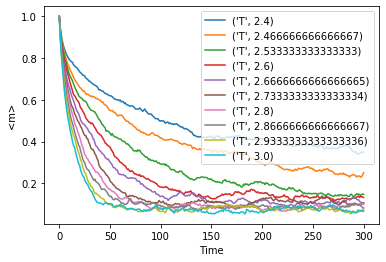

In [187]:
arr_of_temp = [ [0]*MCS for a in range(10)] 
ins=0
count=0
for i in fives_2:
    K=40
    index=1
    uno = i
    uno_mag=np.zeros(MCS)
    while index<K+1:
        spins = Zero_temperature(L)
        #print(mag(spins)) **TESTER
        j=0
        while j<300:
            uno_mag[j]+=np.abs(mag(spins))
            spins = McMove_glauber(MCS,spins,uno)
            j=j+1
        index=index+1
    uno_mag=uno_mag/K
    arr_of_temp[count]=uno_mag
    count = count+1
    plt.plot(time,uno_mag,label=('T',T[ins]))
    ins=ins+1
    plt.xlabel('Time')
    plt.ylabel('<m>')
    plt.legend()

# ^^ Magnetization for different times using glauber method
# this 'ish took hella long to run
# so i dont wanna change the plot title directly sorry whoopsie doopsie

Text(0.5, 1.0, 'Tau versus Temp for 10 Temp values')

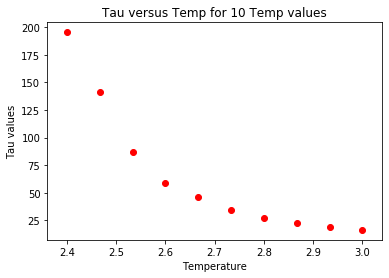

In [188]:
## again we will have to plot the glauber tau values from the mag vertices
## so plot arr_of_temp
tau = np.zeros(10)
j=0
for i in arr_of_temp:
    popt,pcov=curve_fit(func,time,i)
    tau[j]=popt
    j=j+1

plt.scatter(T,tau,color='red')
plt.xlabel('Temperature')
plt.ylabel('Tau values')
plt.title('Tau versus Temp for 10 Temp values(Glauber)')

[14.33287997  1.30845414]
Glauber A and mu are: 14.332879970698746 1.3084541364786972


Text(0.5, 1.0, 'Tau versus Temp for 10 Temp values(Glauber) with fit aha')

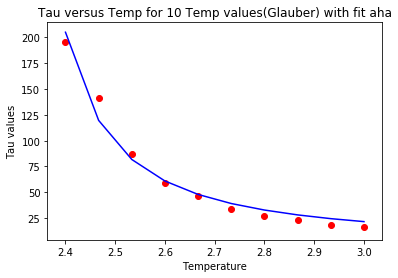

In [192]:
## Now shall we try to fit tau and temperature for A and u 
def func2(T,A,u):
    return A*(T-Tc)**(-u)
#p0=(200,0.3)
popt,pcov=curve_fit(func2,T,tau)
print(popt)
##^^ Those are the values for A and mu
print('Glauber A and mu are:',popt[0],popt[1])

y=func2(T,14.3328,1.308)
plt.plot(T,y,color='blue')
plt.scatter(T,tau,color='red')
plt.xlabel('Temperature')
plt.ylabel('Tau values')
plt.title('Tau versus Temp for 10 Temp values(Glauber) with fit aha')

In [197]:
##now shall we compare the difference in the A and mu 
## for glauber and metropolis
A_diff= 14.332879970698746-9.11896366747541
u_diff=1.3084541364786972-1.432693886481117
print('The difference of the A and mu values with glauber-metro \'ish is', A_diff,u_diff)

The difference of the A and mu values with glauber-metro 'ish is 5.2139163032233355 -0.12423975000241971


    IDEALLY I WOULD HAVE SAT DOWN AND RAN LARGE VALUES OF K TO GET SMOOTHER VALUES FOR THE MAG VERSUS TIME GRAPHS 
    BUT COMPUTRON IS BUSTED AND SO I AM
    THANK YOU GOOD SIRE. 

In [ ]:
#in reality with all the time in the world i choose a large lattice size such that when i take the average of multiple runs 
#it will result in a more smooth graph of <m> versus t for each of the temperatures
##ones that seem to align more with the exponential trend. 